In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=None

In [3]:
df=pd.read_csv("heart (1).csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  303
Number of Columns:  14


In [9]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#check missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
#check duplicate value
df_dup=df.duplicated().any()

In [12]:
df_dup

True

In [13]:
df=df.drop_duplicates()

In [14]:
df_dup=df.duplicated().any()

In [15]:
df_dup

False

In [16]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [18]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [19]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 302, dtype: int64

In [20]:
df['cp'].unique()

array([3, 2, 1, 0])

In [21]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

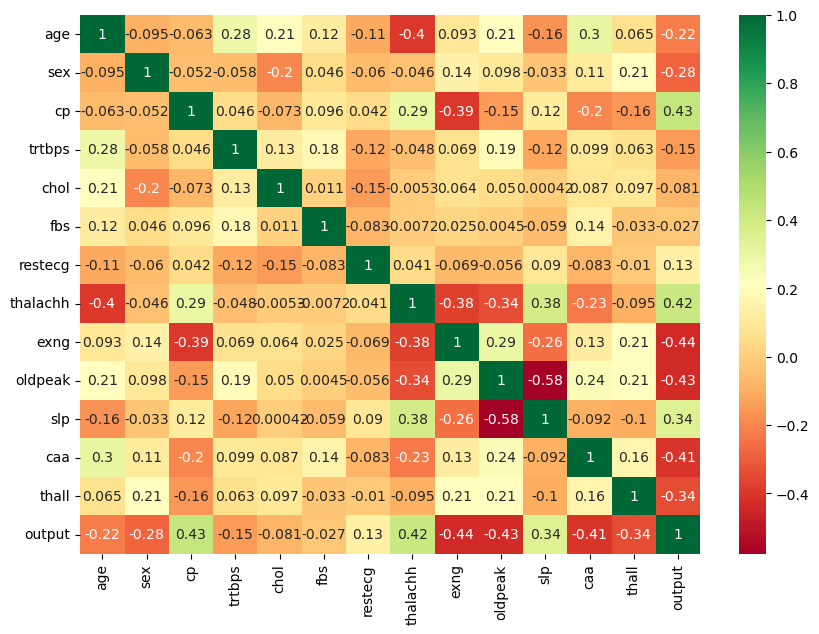

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

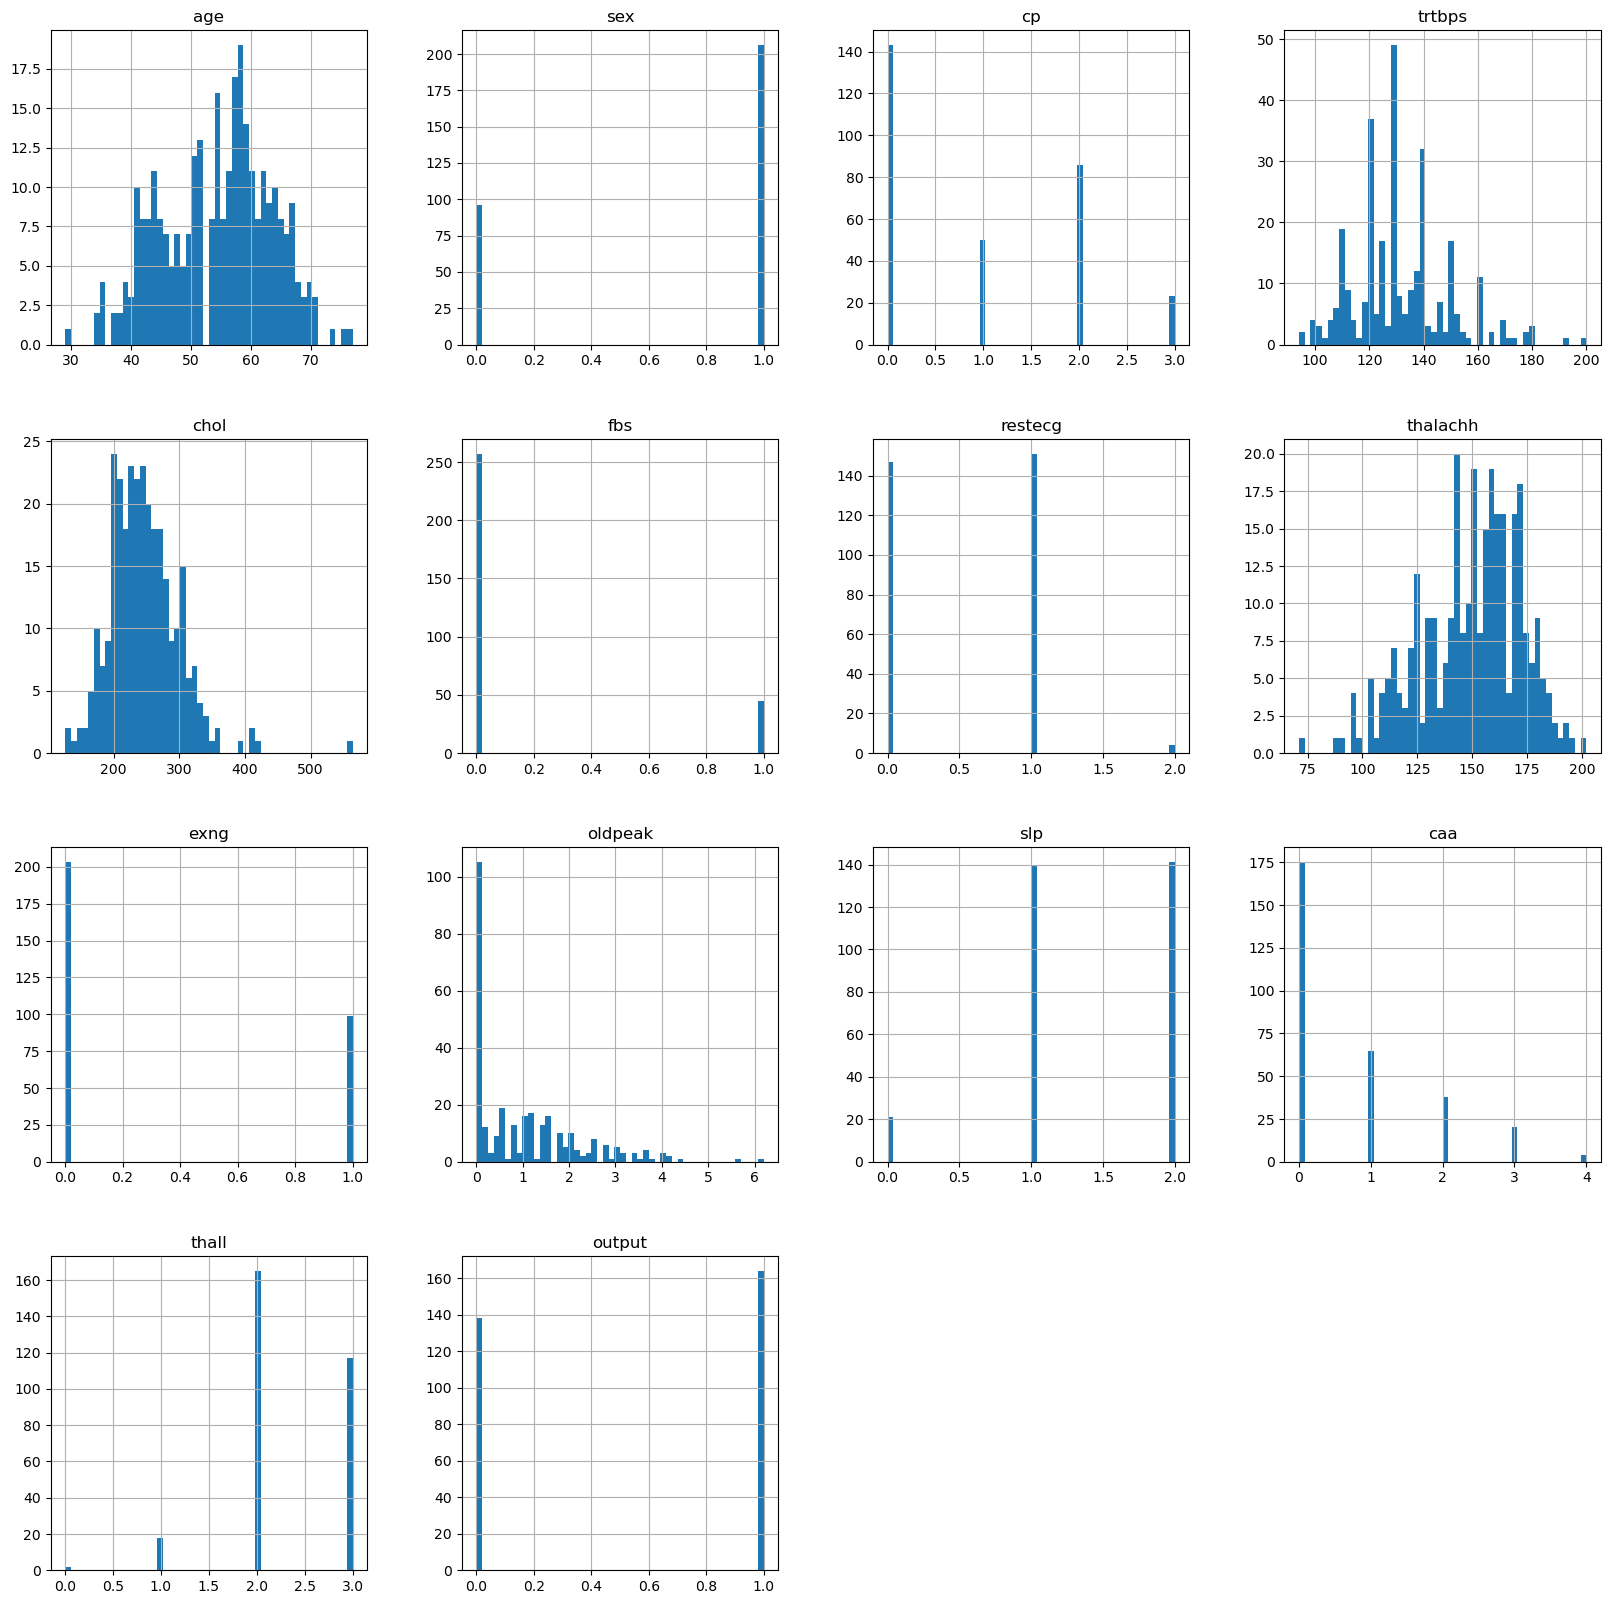

In [24]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [25]:
cate_val.remove('sex')
cate_val.remove('output')
df=pd.get_dummies(df,columns=cate_val,drop_first=True)

In [26]:
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [27]:
#feature scalling
from sklearn.preprocessing import StandardScaler

In [28]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [29]:
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [30]:
#splitting the dataset into the training set and test set
X=df.drop('output',axis=1)

In [31]:
y=df['output']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,True
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,True
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False


In [35]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: output, Length: 241, dtype: int64

In [36]:
X_test

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,True
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,True,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,True
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [37]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: output, Length: 61, dtype: int64

In [38]:
#LOGISTIC REGRESSION
#show output
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


# Logistic Regression

In [39]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [40]:

from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred1=lr.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

In [45]:
cm = confusion_matrix(y_test, y_pred1)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,27,2
Yes,4,28


In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# SUPPORT VECTOR MACHINE (SVM)

In [47]:
from sklearn import svm

In [48]:
svm=svm.SVC()


In [49]:
svm.fit(X_train,y_train)

SVC()

In [50]:
y_pred2=svm.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [52]:
cm = confusion_matrix(y_test, y_pred2)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,27,2
Yes,6,26


In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



# K-Nearest Neighbor(KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred3=knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70aaf67880>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

In [58]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [59]:
cm = confusion_matrix(y_test, y_pred3)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,26,3
Yes,5,27


In [60]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [61]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70a9d0b740>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70aaf91440>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70aaf91440>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70aaf91440>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70aaf91440>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

In [62]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [63]:
    knn=KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy_score(y_test,y_pred)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7d70a9d2c0e0>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

0.8524590163934426

In [64]:
#NON-LINEAR ML ALGORITHM
df=pd.read_csv('heart project.csv')

In [65]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
df=df.drop_duplicates()

In [67]:
df.shape

(302, 14)

In [68]:
x=df.drop('output',axis=1)
y=df['output']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# DECISION TREE CLASSIFIER

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt=DecisionTreeClassifier()

In [72]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred4=dt.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

In [75]:
cm = confusion_matrix(y_test, y_pred4)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,24,5
Yes,10,22


In [76]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



# RANDOM FOREST CLASSIFIER

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier()

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred5=rf.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [82]:
cm = confusion_matrix(y_test, y_pred5)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,24,5
Yes,5,27


In [83]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# GRADIENT BOOSTING CLASSIFIER

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbc=GradientBoostingClassifier()

In [86]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
y_pred6=gbc.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred6)

0.7540983606557377

In [89]:
cm = confusion_matrix(y_test, y_pred6)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,25,4
Yes,11,21


In [90]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



# NAIVE BAYES CLASSIFIER

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gnb=GaussianNB()

In [93]:
gnb.fit(X_train,y_train)

GaussianNB()

In [94]:
y_pred7=gnb.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred7)

0.8524590163934426

In [96]:
cm = confusion_matrix(y_test, y_pred7)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,26,3
Yes,6,26


In [97]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [98]:
final_df=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB','NB'],
                  'ACC':[accuracy_score(y_test,y_pred1),
                         accuracy_score(y_test,y_pred2),
                         accuracy_score(y_test,y_pred3),
                         accuracy_score(y_test,y_pred4),
                         accuracy_score(y_test,y_pred5),
                         accuracy_score(y_test,y_pred6),
                         accuracy_score(y_test,y_pred7)]})

In [99]:
final_df

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.754098
4,RF,0.836066
5,GB,0.754098
6,NB,0.852459


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

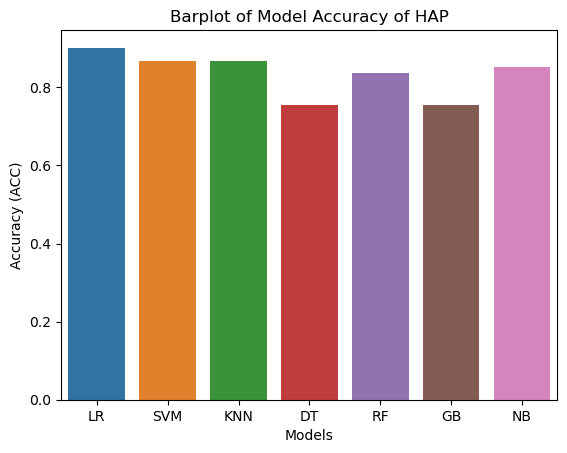

In [101]:
# Create a barplot
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of HAP')

plt.show()

In [102]:
X=df.drop('output',axis=1)
y=df['output']

In [103]:
X.shape

(302, 13)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr=LogisticRegression()
lr.fit(X,y)

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
import pandas as pd

data = {
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trtbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [168],
    'exng': [0],
    'oldpeak': [1.0],
    'slp': [2],
    'caa': [2],
    'thall': [3],
}

new_df = pd.DataFrame(data, index=[0])

In [107]:
new_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [108]:
p=lr.predict(new_df)


In [109]:
p=lr.predict(new_df)
if p[0]==0:
    print("No Disease")
else:
     print("Disease")

No Disease


In [110]:
import joblib

In [111]:
joblib.dump(lr,'model_joblib_heartprediction')

['model_joblib_heartprediction']

In [112]:
model=joblib.load('model_joblib_heartprediction')

In [113]:
model.predict(new_df)

array([0])

In [114]:
#GUI
from tkinter import *
import joblib

In [115]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox
import joblib

# Create the GUI window
master = tk.Tk()
master.title("Heart Diseases Prediction System")

# Function to make predictions
def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        model = joblib.load('model_joblib_heartprediction')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        if result == 0:
            prediction_text.set("No Heart Diseases")
        else:
            prediction_text.set("Possibility of Heart Diseases")
    except ValueError:
        messagebox.showerror("Error", "Invalid input. Please enter numeric values.")

# Create input fields and labels
Label(master, text="Heart Diseases Prediction System", bg="Red", fg="yellow",width=50,font=('Helvetica', 24, 'bold')).grid(row=0, columnspan=2)
master.configure(bg="lightblue")

Label(master, text="Enter your Age",font=('Helvetica', 20, 'bold')).grid(row=1)
Label(master, text="Male or Female[1/0]",font=('Helvetica', 20, 'bold')).grid(row=2)
Label(master, text="Enter value of CP",font=('Helvetica', 20, 'bold')).grid(row=3)
Label(master, text="Enter value of trtbps",font=('Helvetica', 20, 'bold')).grid(row=4)
Label(master, text="Enter value of chol",font=('Helvetica', 20, 'bold')).grid(row=5)
Label(master, text="Enter value of fbs",font=('Helvetica', 20, 'bold')).grid(row=6)
Label(master, text="Enter value of restecg",font=('Helvetica', 20, 'bold')).grid(row=7)
Label(master, text="Enter value of thalachh",font=('Helvetica', 20, 'bold')).grid(row=8)
Label(master, text="Enter value of exng",font=('Helvetica', 20, 'bold')).grid(row=9)
Label(master, text="Enter value of oldpeak",font=('Helvetica', 20, 'bold')).grid(row=10)
Label(master, text="Enter value of slp",font=('Helvetica', 20, 'bold')).grid(row=11)
Label(master, text="Enter value of caa",font=('Helvetica', 20, 'bold')).grid(row=12)
Label(master, text="Enter value of thall",font=('Helvetica', 20, 'bold')).grid(row=13)

# Create input fields
e1 = Entry(master)
e1.grid(row=1, column=1)
e2 = Entry(master)
e2.grid(row=2, column=1)
e3 = Entry(master)
e3.grid(row=3, column=1)
e4 = Entry(master)
e4.grid(row=4, column=1)
e5 = Entry(master)
e5.grid(row=5, column=1)
e6 = Entry(master)
e6.grid(row=6, column=1)
e7 = Entry(master)
e7.grid(row=7, column=1)
e8 = Entry(master)
e8.grid(row=8, column=1)
e9 = Entry(master)
e9.grid(row=9, column=1)
e10 = Entry(master)
e10.grid(row=10, column=1)
e11 = Entry(master)
e11.grid(row=11, column=1)
e12 = Entry(master)
e12.grid(row=12, column=1)
e13 = Entry(master)
e13.grid(row=13, column=1)

# Create the prediction button
Button(master, text='Predict',font=('Helvetica', 20, 'bold'), command=show_entry_fields).grid(row=50, columnspan=2,pady=4)

# Create a variable to display prediction result
prediction_text = tk.StringVar()
Label(master, textvariable=prediction_text).grid(row=15, columnspan=2)

# Start the GUI main loop
master.mainloop()
